Importing Data and Packages

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [4]:
crashes = pd.read_csv('./Crashes.csv')

C:\Users\thoma\AppData\Local\Temp\ipykernel_9756\3295066010.py:1: DtypeWarning: Columns (17,22,26,43,44,45,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  crashes = pd.read_csv('./Crashes.csv')


In [5]:
crashes.head()

,X,Y,OBJECTID,CRASH_ID,SER_NO,CRASH_DT,CRASH_HR_NO,CRASH_HR_LONG_DESC,CNTY_ID,CNTY_NM,...,TOT_PED_INJ_A_CNT,TOT_PEDCYCL_INJ_A_CNT,TOT_MTRCYCL_FATAL_CNT,TOT_MTRCYCL_INJ_A_CNT,HIGHEST_INJ_SVRTY_CD,HIGHEST_INJ_SVRTY_DESC,MJ_INVLV_FLG,GIS_JURIS,TOT_MTRCYCL_CNT,TOT_MOTOR_CNT
0,7672502.021,674041.4013,1,1724606,82277.0,2017/06/09 08:00:00+00,15,03:00 PM to 03:59 PM,26,Multnomah,...,0,0,0,0,5,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
1,7672746.505,674156.7255,2,1757545,6158.0,2017/06/10 08:00:00+00,7,07:00 AM to 07:59 AM,26,Multnomah,...,0,0,0,0,5,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
2,7674265.128,673553.6550,3,1765991,3874.0,2017/04/15 08:00:00+00,17,05:00 PM to 05:59 PM,26,Multnomah,...,0,0,0,0,5,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
3,7672578.321,675520.6365,4,1724862,6732.0,2017/04/13 08:00:00+00,15,03:00 PM to 03:59 PM,26,Multnomah,...,0,0,0,0,5,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
4,7671769.903,674221.2235,5,1768003,11764.0,2017/10/19 08:00:00+00,8,08:00 AM to 08:59 AM,26,Multnomah,...,0,0,0,0,5,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2


In [6]:
crashes.columns

Index(['X', 'Y', 'OBJECTID', 'CRASH_ID', 'SER_NO', 'CRASH_DT', 'CRASH_HR_NO',
       'CRASH_HR_LONG_DESC', 'CNTY_ID', 'CNTY_NM',
       ...
       'TOT_PED_INJ_A_CNT', 'TOT_PEDCYCL_INJ_A_CNT', 'TOT_MTRCYCL_FATAL_CNT',
       'TOT_MTRCYCL_INJ_A_CNT', 'HIGHEST_INJ_SVRTY_CD',
       'HIGHEST_INJ_SVRTY_DESC', 'MJ_INVLV_FLG', 'GIS_JURIS',
       'TOT_MTRCYCL_CNT', 'TOT_MOTOR_CNT'],
      dtype='object', length=151)

**Data Cleaning**

In [7]:
#list of all the columns in crashes

crashes_columns = []

for c in crashes.columns:

  crashes_columns. append(c)
  
print(crashes_columns)

['X', 'Y', 'OBJECTID', 'CRASH_ID', 'SER_NO', 'CRASH_DT', 'CRASH_HR_NO', 'CRASH_HR_LONG_DESC', 'CNTY_ID', 'CNTY_NM', 'CITY_SECT_ID', 'CITY_SECT_NM', 'URB_AREA_CD', 'URB_AREA_LONG_NM', 'FC_CD', 'FC_DESC', 'NHS_FLG', 'RTE_ID', 'RTE_NM', 'RTE_TYP_CD', 'HWY_NO', 'HWY_MED_NM', 'HWY_SFX_NO', 'RDWY_NO', 'HWY_COMPNT_CD', 'HWY_COMPNT_LONG_DESC', 'MLGE_TYP_CD', 'MLGE_TYP_LONG_DESC', 'RD_CON_NO', 'MP_NO', 'LRS_VAL', 'LAT_DEG_NO', 'LAT_MINUTE_NO', 'LAT_SEC_NO', 'LONGTD_DEG_NO', 'LONGTD_MINUTE_NO', 'LONGTD_SEC_NO', 'LAT_DD', 'LONGTD_DD', 'SEG_MRK_ID', 'SEG_PT_LRS_MEAS', 'UNLOCT_FLG', 'SPECL_JRSDCT_ID', 'SPECL_JRSDCT_LONG_DESC', 'RECRE_RD_NM', 'ISECT_RECRE_RD_NM', 'AGY_ST_NO', 'ST_FULL_NM', 'ISECT_AGY_ST_NO', 'ISECT_ST_FULL_NM', 'ISECT_SEQ_NO', 'FROM_ISECT_DSTNC_QTY', 'CMPSS_DIR_CD', 'CMPSS_DIR_SHORT_DESC', 'POST_SPEED_LMT_VAL', 'RD_CHAR_CD', 'RD_CHAR_LONG_DESC', 'OFF_RDWY_FLG', 'ISECT_TYP_CD', 'ISECT_TYP_SHORT_DESC', 'RNDABT_FLG', 'ISECT_REL_FLG', 'DRVWY_REL_FLG', 'LN_QTY', 'TURNG_LEG_QTY', 'MEDN_TY

In [8]:
#list of all id columns

id_columns = []

for c in crashes_columns:

  if c[-2:] == "ID":
    id_columns.append(c)
    
print(id_columns)

['OBJECTID', 'CRASH_ID', 'CNTY_ID', 'CITY_SECT_ID', 'RTE_ID', 'SEG_MRK_ID', 'SPECL_JRSDCT_ID', 'REG_ID', 'DIST_ID']


In [9]:
#removing id columns in data
crashes_new = crashes.drop(id_columns, axis=1)

In [10]:
#list of all code columns

cd_columns = []

for c in crashes_columns:

  if c[-2:] == "CD":
    cd_columns.append(c)
    
print(cd_columns)

['URB_AREA_CD', 'FC_CD', 'RTE_TYP_CD', 'HWY_COMPNT_CD', 'MLGE_TYP_CD', 'CMPSS_DIR_CD', 'RD_CHAR_CD', 'ISECT_TYP_CD', 'MEDN_TYP_CD', 'IMPCT_LOC_CD', 'CRASH_TYP_CD', 'COLLIS_TYP_CD', 'CRASH_SVRTY_CD', 'WTHR_COND_CD', 'RD_SURF_COND_CD', 'LGT_COND_CD', 'TRAF_CNTL_DEVICE_CD', 'INVSTG_AGY_CD', 'POP_RNG_CD', 'RD_CNTL_CD', 'CRASH_WK_DAY_CD', 'CRASH_CAUSE_1_CD', 'CRASH_CAUSE_2_CD', 'CRASH_CAUSE_3_CD', 'CRASH_EVNT_1_CD', 'CRASH_EVNT_2_CD', 'CRASH_EVNT_3_CD', 'HIGHEST_INJ_SVRTY_CD']


In [11]:
# Removing cd columns in data

crashes_new = crashes_new.drop(cd_columns, axis=1)
crashes_new

,X,Y,SER_NO,CRASH_DT,CRASH_HR_NO,CRASH_HR_LONG_DESC,CNTY_NM,CITY_SECT_NM,URB_AREA_LONG_NM,FC_DESC,...,TOT_MOTOR_INJ_A,TOT_PED_INJ_A_CNT,TOT_PEDCYCL_INJ_A_CNT,TOT_MTRCYCL_FATAL_CNT,TOT_MTRCYCL_INJ_A_CNT,HIGHEST_INJ_SVRTY_DESC,MJ_INVLV_FLG,GIS_JURIS,TOT_MTRCYCL_CNT,TOT_MOTOR_CNT
0,7672502.021,674041.4013,82277.0,2017/06/09 08:00:00+00,15,03:00 PM to 03:59 PM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - INTERSTATE,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
1,7672746.505,674156.7255,6158.0,2017/06/10 08:00:00+00,7,07:00 AM to 07:59 AM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - INTERSTATE,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
2,7674265.128,673553.6550,3874.0,2017/04/15 08:00:00+00,17,05:00 PM to 05:59 PM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - OTHER,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
3,7672578.321,675520.6365,6732.0,2017/04/13 08:00:00+00,15,03:00 PM to 03:59 PM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - INTERSTATE,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
4,7671769.903,674221.2235,11764.0,2017/10/19 08:00:00+00,8,08:00 AM to 08:59 AM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - OTHER,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338983,7656974.314,674482.6578,1441.0,2021/03/29 08:00:00+00,17,05:00 PM to 05:59 PM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - OTHER,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),0.0,Portland,0,2
338984,7643699.260,677895.3219,6284.0,2021/10/09 08:00:00+00,11,11:00 AM to 11:59 AM,Multnomah,Portland SW,Portland UA,URBAN PRINCIPAL ARTERIAL - INTERSTATE,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),0.0,Portland,0,2
338985,7869582.191,601144.6653,93787.0,2021/12/09 08:00:00+00,7,07:00 AM to 07:59 AM,Clackamas,NaN,NaN,RURAL PRINCIPAL ARTERIAL - OTHER,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),0.0,Unincorporated Clackamas Co.,0,1
338986,7624386.766,676599.4598,674.0,2021/02/26 08:00:00+00,19,07:00 PM to 07:59 PM,Washington,Beaverton,Portland UA,URBAN PRINCIPAL ARTERIAL - OTHER,...,0,0,0,0,0,Suspected Minor Injury Crash (B),0.0,Beaverton,0,3


In [12]:
crashes_portland = crashes_new.dropna(subset = 'CITY_SECT_NM')
crashes_portland = crashes_portland[crashes_portland['CITY_SECT_NM'].str.contains('Portland')]
crashes_portland

,X,Y,SER_NO,CRASH_DT,CRASH_HR_NO,CRASH_HR_LONG_DESC,CNTY_NM,CITY_SECT_NM,URB_AREA_LONG_NM,FC_DESC,...,TOT_MOTOR_INJ_A,TOT_PED_INJ_A_CNT,TOT_PEDCYCL_INJ_A_CNT,TOT_MTRCYCL_FATAL_CNT,TOT_MTRCYCL_INJ_A_CNT,HIGHEST_INJ_SVRTY_DESC,MJ_INVLV_FLG,GIS_JURIS,TOT_MTRCYCL_CNT,TOT_MOTOR_CNT
0,7672502.021,674041.4013,82277.0,2017/06/09 08:00:00+00,15,03:00 PM to 03:59 PM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - INTERSTATE,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
1,7672746.505,674156.7255,6158.0,2017/06/10 08:00:00+00,7,07:00 AM to 07:59 AM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - INTERSTATE,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
2,7674265.128,673553.6550,3874.0,2017/04/15 08:00:00+00,17,05:00 PM to 05:59 PM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - OTHER,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
3,7672578.321,675520.6365,6732.0,2017/04/13 08:00:00+00,15,03:00 PM to 03:59 PM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - INTERSTATE,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
4,7671769.903,674221.2235,11764.0,2017/10/19 08:00:00+00,8,08:00 AM to 08:59 AM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - OTHER,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338977,7629284.997,683380.7277,8041.0,2021/12/11 08:00:00+00,13,01:00 PM to 01:59 PM,Multnomah,Portland W. Burnside,Portland UA,URBAN MINOR ARTERIAL,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),0.0,Portland,0,2
338978,7648909.075,684396.3969,5953.0,2021/09/27 08:00:00+00,9,09:00 AM to 09:59 AM,Multnomah,Portland NE,Portland UA,URBAN PRINCIPAL ARTERIAL - OTHER,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),0.0,Portland,0,2
338981,7678813.530,703700.9815,2569.0,2021/05/18 08:00:00+00,16,04:00 PM to 04:59 PM,Multnomah,Portland NE,Portland UA,URBAN PRINCIPAL ARTERIAL - INTERSTATE,...,0,0,0,0,0,Possible Injury Crash (C),0.0,Portland,0,2
338983,7656974.314,674482.6578,1441.0,2021/03/29 08:00:00+00,17,05:00 PM to 05:59 PM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - OTHER,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),0.0,Portland,0,2


In [13]:
for col in crashes_portland.columns:

    print(col)

X
Y
SER_NO
CRASH_DT
CRASH_HR_NO
CRASH_HR_LONG_DESC
CNTY_NM
CITY_SECT_NM
URB_AREA_LONG_NM
FC_DESC
NHS_FLG
RTE_NM
HWY_NO
HWY_MED_NM
HWY_SFX_NO
RDWY_NO
HWY_COMPNT_LONG_DESC
MLGE_TYP_LONG_DESC
RD_CON_NO
MP_NO
LRS_VAL
LAT_DEG_NO
LAT_MINUTE_NO
LAT_SEC_NO
LONGTD_DEG_NO
LONGTD_MINUTE_NO
LONGTD_SEC_NO
LAT_DD
LONGTD_DD
SEG_PT_LRS_MEAS
UNLOCT_FLG
SPECL_JRSDCT_LONG_DESC
RECRE_RD_NM
ISECT_RECRE_RD_NM
AGY_ST_NO
ST_FULL_NM
ISECT_AGY_ST_NO
ISECT_ST_FULL_NM
ISECT_SEQ_NO
FROM_ISECT_DSTNC_QTY
CMPSS_DIR_SHORT_DESC
POST_SPEED_LMT_VAL
RD_CHAR_LONG_DESC
OFF_RDWY_FLG
ISECT_TYP_SHORT_DESC
RNDABT_FLG
ISECT_REL_FLG
DRVWY_REL_FLG
LN_QTY
TURNG_LEG_QTY
MEDN_TYP_LONG_DESC
CRASH_TYP_LONG_DESC
COLLIS_TYP_LONG_DESC
CRASH_SVRTY_LONG_DESC
WTHR_COND_LONG_DESC
RD_SURF_MED_DESC
LGT_COND_LONG_DESC
TRAF_CNTL_DEVICE_LONG_DESC
TRAF_CNTL_FUNC_FLG
INVSTG_AGY_LONG_DESC
SCHL_ZONE_IND
WRK_ZONE_IND
ALCHL_INVLV_FLG
DRUG_INVLV_FLG
CRASH_SPEED_INVLV_FLG
CRASH_HIT_RUN_FLG
POP_RNG_MED_DESC
RD_CNTL_MED_DESC
TOT_VHCL_CNT
TOT_FATAL_CNT
TOT_I

Making a list of relevant columns:
Gonna want to keep CRASH_WK_DAY_CD

In [14]:
# Removing irrelevant columns:

unused_columns = ['CRASH_DT', 'X', 'Y', 'SER_NO', 'HWY_NO', 'HWY_SFX_NO', 'LRS_VAL', 'AGY_ST_NO', 'ISECT_AGY_ST_NO', 'ISECT_SEQ_NO', 'FROM_ISECT_DSTNC_QTY', 'GIS_PRC_DT', # Irrelevant Information
                      'CNTY_NM', 'CITY_SECT_NM', 'URB_AREA_LONG_NM', 'CRASH_HR_LONG_DESC', 'POP_RNG_MED_DESC', 'EFFECTV_DT', 'GIS_JURIS', # Redundant Information
                      'LAT_DEG_NO', 'LAT_MINUTE_NO', 'LAT_SEC_NO', 'LONGTD_DEG_NO', 'LONGTD_MINUTE_NO', 'LONGTD_SEC_NO', #Latitude/Longitude
                      'SEG_PT_LRS_MEAS', 'SPECL_JRSDCT_LONG_DESC', 'RECRE_RD_NM', 'ISECT_RECRE_RD_NM', # No values - All missing data
                      'UNLOCT_FLG', 'TRAF_CNTL_FUNC_FLG', 'UGB', 'MPA', # Flags that have only one value
                      'CRASH_CAUSE_2_LONG_DESC', 'CRASH_CAUSE_3_LONG_DESC', 'CRASH_EVNT_2_LONG_DESC', 'CRASH_EVNT_3_LONG_DESC' # Extraneous crash event descriptions
                      ]

crashes_portland = crashes_portland.drop(unused_columns, axis = 1)

In [15]:
# These are the 77 columns that we will be considering

for col in crashes_portland.columns:

    print(col)

CRASH_HR_NO
FC_DESC
NHS_FLG
RTE_NM
HWY_MED_NM
RDWY_NO
HWY_COMPNT_LONG_DESC
MLGE_TYP_LONG_DESC
RD_CON_NO
MP_NO
LAT_DD
LONGTD_DD
ST_FULL_NM
ISECT_ST_FULL_NM
CMPSS_DIR_SHORT_DESC
POST_SPEED_LMT_VAL
RD_CHAR_LONG_DESC
OFF_RDWY_FLG
ISECT_TYP_SHORT_DESC
RNDABT_FLG
ISECT_REL_FLG
DRVWY_REL_FLG
LN_QTY
TURNG_LEG_QTY
MEDN_TYP_LONG_DESC
CRASH_TYP_LONG_DESC
COLLIS_TYP_LONG_DESC
CRASH_SVRTY_LONG_DESC
WTHR_COND_LONG_DESC
RD_SURF_MED_DESC
LGT_COND_LONG_DESC
TRAF_CNTL_DEVICE_LONG_DESC
INVSTG_AGY_LONG_DESC
SCHL_ZONE_IND
WRK_ZONE_IND
ALCHL_INVLV_FLG
DRUG_INVLV_FLG
CRASH_SPEED_INVLV_FLG
CRASH_HIT_RUN_FLG
RD_CNTL_MED_DESC
TOT_VHCL_CNT
TOT_FATAL_CNT
TOT_INJ_LVL_A_CNT
TOT_INJ_LVL_B_CNT
TOT_INJ_LVL_C_CNT
TOT_INJ_CNT
TOT_UNINJD_AGE00_04_CNT
TOT_OCCUP_CNT
TOT_UNINJD_PER_CNT
TOT_PED_CNT
TOT_PED_FATAL_CNT
TOT_PED_INJ_CNT
TOT_PEDCYCL_CNT
TOT_PEDCYCL_FATAL_CNT
TOT_PEDCYCL_INJ_CNT
TOT_UNKNWN_CNT
TOT_UNKNWN_FATAL_CNT
TOT_UNKNWN_INJ_CNT
TOT_PER_INVLV_CNT
TOT_SFTY_EQUIP_USED_QTY
TOT_SFTY_EQUIP_UNUSED_QTY
TOT_SFTY_EQUIP_

EDA and Visualizations

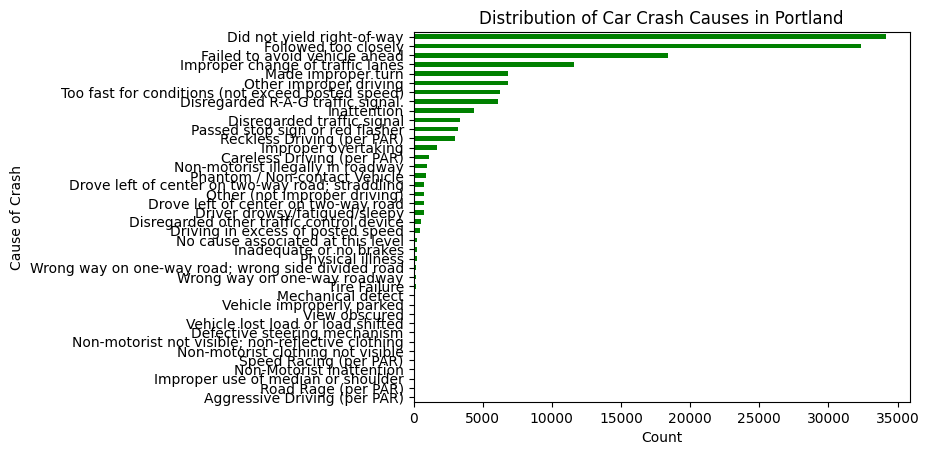

In [16]:
causes = crashes_portland['CRASH_CAUSE_1_LONG_DESC'].value_counts()[::-1]

causes_plot = causes.plot(kind = "barh", color = "green")
plt.xlabel("Count")
plt.ylabel("Cause of Crash")
plt.title("Distribution of Car Crash Causes in Portland")
plt.show()

C:\Users\thoma\AppData\Local\Temp\ipykernel_9756\1816089627.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x = causes_filtered[index], y = index, s = causes_filtered[index], va = "center")


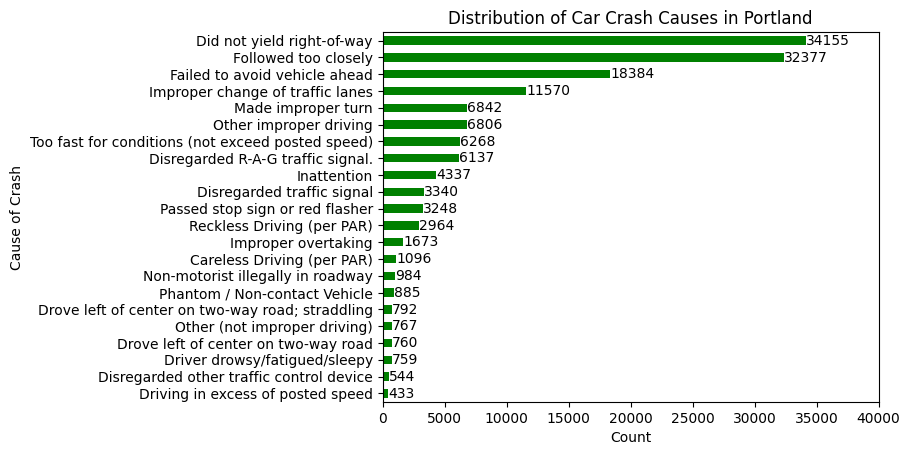

In [17]:
causes_filtered = causes[causes > 300]

causes_plot = causes_filtered.plot(kind = "barh", color = "green")
causes_plot.set_xlim(0, 40000)

# Adding data labels
for index in range(len(causes_filtered)):
    
    plt.text(x = causes_filtered[index], y = index, s = causes_filtered[index], va = "center")

plt.xlabel("Count")
plt.ylabel("Cause of Crash")
plt.title("Distribution of Car Crash Causes in Portland")
plt.show()

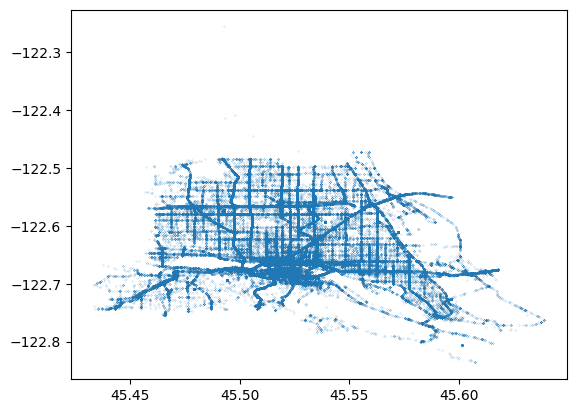

In [18]:
plt.scatter(crashes_portland["LAT_DD"], crashes_portland["LONGTD_DD"], alpha = 1, s = 0.01)

In [19]:
num_fatal_crashes = sum(crashes_portland["fatalflag"])
num_crashes = crashes_portland.shape[0]

print(num_fatal_crashes, num_crashes, num_fatal_crashes / num_crashes)

# Only 0.35% of the crashes were fatal... May not have enough data to make a good supervised learning model?

KeyError: 'fatalflag'

In [22]:
for column in crashes_portland.columns:

    print(crashes_portland[column].value_counts())

CRASH_HR_NO
17    15774
16    13942
15    12962
18    10925
14    10800
13     9539
12     8728
11     7438
8      7353
19     6546
10     6279
9      6145
7      6054
20     4400
21     4237
22     3788
6      3138
23     2919
0      1920
2      1839
1      1582
99     1449
5      1365
3       991
4       813
Name: count, dtype: int64
FC_DESC
URBAN PRINCIPAL ARTERIAL - OTHER                     42854
URBAN MINOR ARTERIAL                                 36495
URBAN PRINCIPAL ARTERIAL - INTERSTATE                25487
URBAN COLLECTOR                                      17270
URBAN LOCAL                                          14677
URBAN MAJOR COLLECTOR                                 9308
URBAN PRINCIPAL ARTERIAL - OTHER FREEWAYS AND EXP     4530
URBAN MINOR COLLECTOR                                  303
Name: count, dtype: int64
NHS_FLG
 0    91025
 1    57004
-1     2897
Name: count, dtype: int64
RTE_NM
US 26      12143
I-5        10478
IS 205      5983
US 30BY     5259
I-84       

Looking at differences between distributions over time

Looking at ratios of categories to total number of crashes

Fatal crashes
Total number of car crashes over time
Hit and run over time
DRUG_INVLV_FLG
ALCHL_INVLV_FLG
SCHL_ZONE_IND
WRK_ZONE_IND
LGT_COND_LONG_DESC
RD_SURF_MED_DESC
WTHR_COND_LONG_DESC
CRASH_SVRTY_LONG_DESC
POST_SPEED_LMT_VAL
CRASH_HR_NO

Looking at how certain attributes change over time

In [ ]:
# Selecting particular columns

distributions = crashes_portland[["CRASH_YR_NO", "CRASH_SVRTY_LONG_DESC", "CRASH_HR_NO", "POST_SPEED_LMT_VAL", "CRASH_HIT_RUN_FLG", "DRUG_INVLV_FLG", "ALCHL_INVLV_FLG", "SCHL_ZONE_IND", "WRK_ZONE_IND", "LGT_COND_LONG_DESC", "RD_SURF_MED_DESC", "WTHR_COND_LONG_DESC"]]

In [25]:
# Cross Tabulation

weather_severity = pd.crosstab(crashes_portland['CRASH_SVRTY_LONG_DESC'], crashes_portland['WTHR_COND_LONG_DESC'], )
print(weather_severity)

chi2, p, _, _ = chi2_contingency(weather_severity)
print(chi2, p)

WTHR_COND_LONG_DESC    Ash  Clear  Cloudy  Dust  Fog   Rain  Sleet  Smoke  \
CRASH_SVRTY_LONG_DESC                                                       
Fatal                    0    214     179     0    5     86      0      0   
Non-Fatal Injury         6  52081    4077     1  326  13414     55     32   
Property Damage Only     8  54580    3126     0  489  13811     64     18   

WTHR_COND_LONG_DESC    Snow  Unknown  
CRASH_SVRTY_LONG_DESC                 
Fatal                     3       46  
Non-Fatal Injury        562     1914  
Property Damage Only   1016     4813  
2400.955391479954 0.0
